## Generating the Mandlebrot set

June 2nd, 2024

Jacob L. Fine

The Mandlebrot set is obtained by iterating the complex function f_c(z) = z^2 + c on every complex number c, starting with the z = 0 for each c.

Therefore, we apply f_c(0), then f_c(f_c(0)), then f_c(f_c(f_c(0))), and so on, and determine, for each c, whether the function remains bounded or diverges. If the function remains bounded, then c is a member of the Mandlebrot set. Else, we record the number of iterations it took to 'escape' some upper bound. We use 2 as the upper bound, since by definition, as soon as f_c(z) exceeds 2 for some z and c, the value will continue to grow with the number of iterations.

We may then plot these results, such that if c is in the Mandlebrot set, we color it yellow, otherwise assign a color based on the number of iterations it took to become larger than 2. 

The result is an elegant fractal, which will be shown below!

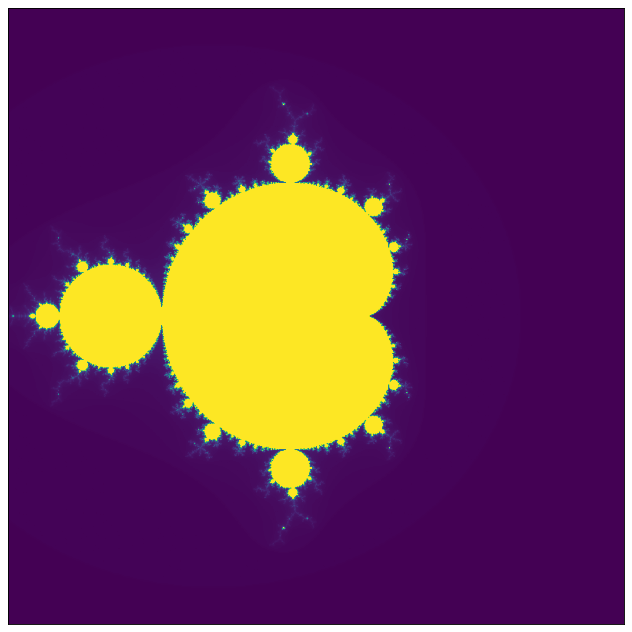

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Defines the function to create the Mandelbrot set, which will be applied to values in the complex plane.
def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        # As soon as the complex number exceeds the upper bound of 2, it will tend to infinity and will thus not be part of the Mandelbrot set. 
        # We wish to record the n for which this occurs.
        if abs(z) > 2:
            return n
        # Else, apply the function again
        z = z*z + c
    return max_iter

# Applies the Mandelbrot function to create the set
def draw_mandelbrot(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)  # The first dimension
    r2 = np.linspace(ymin, ymax, height)  # The second dimension
    # Applies the Mandelbrot function to each value in the complex plane
    M = np.array([[mandelbrot(complex(r, i), max_iter) for r in r1] for i in r2])
    return (r1, r2, M)

# Tunes parameters pertaining to the generation of the image and the domain
def main(xmin, xmax, ymin, ymax, zoom):
    dpi = 80
    img_width = 800
    img_height = 800
    max_iter = 256

    # Adjusting the range based on the zoom
    xrange = (xmax - xmin) * zoom
    yrange = (ymax - ymin) * zoom
    xmid = (xmin + xmax) / 2
    ymid = (ymin + ymax) / 2
    xmin = xmid - xrange / 2
    xmax = xmid + xrange / 2
    ymin = ymid - yrange / 2
    ymax = ymid + yrange / 2

    x, y, z = draw_mandelbrot(xmin, xmax, ymin, ymax, img_width, img_height, max_iter)

    fig, ax = plt.subplots(figsize=(img_width/dpi, img_height/dpi), dpi=dpi)
    ax.imshow(z, origin='lower', extent=(xmin, xmax, ymin, ymax))

    # Remove tick to obtain just the image
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

if __name__ == "__main__":
    # Generates the Mandelbrot set with an initial zoom factor of 1
    # Adjust these values to zoom out more or change the region of interest
    main(-3.0, 3.0, -3.0, 3.0, 0.5)  # Zoom factor less than 1 will zoom out
